In [1]:
import pandas as pd
from sklearn.datasets import load_digits
digits = load_digits()

In [2]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [8]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [4]:
df = pd.DataFrame(digits.data , digits.target)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [9]:
df['target'] = digits.target
df.head()


,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [10]:
X = df.drop(['target'] , axis = 'columns')
y = df['target']

In [23]:
from sklearn.model_selection import train_test_split
X_test , X_train , y_test , y_train = train_test_split(X, y , test_size = 0.2 , random_state = 10)

In [24]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5)

In [25]:
knn.fit(X_train , y_train)

KNeighborsClassifier()

In [26]:
knn.score(X_test , y_test)

0.9679888656924147

In [27]:
from sklearn.metrics import confusion_matrix
y_predicted = knn.predict(X_test)

In [28]:
cm = confusion_matrix(y_predicted , y_test)

In [29]:
cm

array([[141,   0,   0,   0,   0,   0,   1,   0,   0,   1],
       [  0, 145,   2,   1,   0,   0,   1,   0,   5,   1],
       [  0,   0, 140,   0,   0,   0,   0,   0,   1,   0],
       [  0,   0,   0, 136,   0,   1,   0,   0,   1,   3],
       [  0,   0,   0,   0, 144,   1,   0,   0,   0,   0],
       [  0,   0,   0,   1,   0, 146,   0,   0,   1,   3],
       [  0,   0,   0,   0,   0,   1, 141,   0,   0,   0],
       [  0,   0,   0,   3,   2,   0,   0, 139,   1,   1],
       [  0,   2,   1,   0,   0,   0,   1,   0, 130,   3],
       [  0,   1,   0,   2,   1,   1,   0,   0,   2, 129]])

Text(58.222222222222214, 0.5, 'Truth')

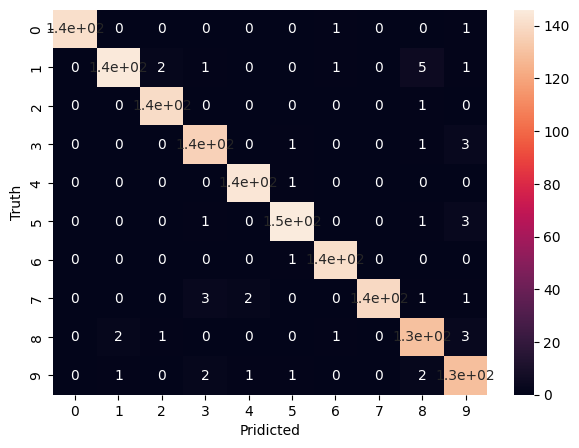

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(7,5))
sns.heatmap(cm , annot = True)
plt.xlabel('Pridicted')
plt.ylabel('Truth')